In [14]:
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [45]:
data = pd.read_csv("../assets/trainWeatherSpray.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.columns

Index([u'Address', u'AddressAccuracy', u'AddressNumberAndStreet', u'Block',
       u'Latitude', u'Longitude', u'NumMosquitos', u'Species', u'Street',
       u'Time', u'Trap', u'WnvPresent', u'spray', u'Station', u'Tmax', u'Tmin',
       u'Tavg', u'Depart', u'DewPoint', u'WetBulb', u'Heat', u'Cool',
       u'Sunrise', u'Sunset', u'CodeSum', u'Depth', u'Water1', u'SnowFall',
       u'PrecipTotal', u'StnPressure', u'SeaLevel', u'ResultSpeed',
       u'ResultDir', u'AvgSpeed'],
      dtype='object')

In [60]:
data[['NumMosquitos']].resample('D', how=['sum']).head()

/Users/alexandertam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


,NumMosquitos
,sum
Date,
2007-05-29,80.0
2007-05-30,NaN
2007-05-31,NaN
2007-06-01,NaN
2007-06-02,NaN


In [67]:
data[['NumMosquitos']].resample('D').apply(sum).dropna().head()

,NumMosquitos
Date,
2007-05-29,80.0
2007-06-05,254.0
2007-06-26,432.0
2007-06-29,170.0
2007-07-02,480.0


In [83]:
data2007 = data[data.index.year == 2007]

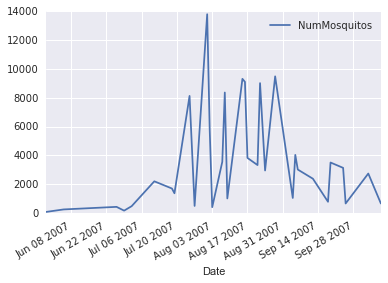

In [84]:
data2007[['NumMosquitos']].resample('D').apply(sum).dropna().plot()

In [89]:
data2009 = data[data.index.year == 2009]

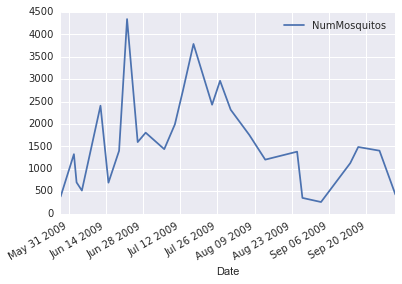

In [90]:
data2009[['NumMosquitos']].resample('D').apply(sum).dropna().plot()

In [91]:
data2011 = data[data.index.year == 2011]

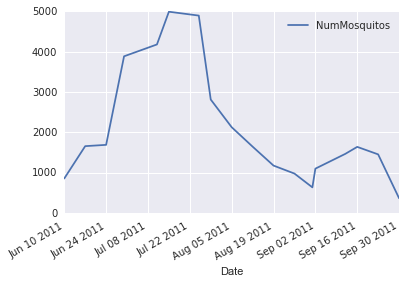

In [92]:
data2011[['NumMosquitos']].resample('D').apply(sum).dropna().plot()

In [70]:
print "Lag 1: ",data2007.NumMosquitos.autocorr(lag=1) # -0.12
print "Lag 2: ",data2007.NumMosquitos.autocorr(lag=2) # -0.03

Lag 1:  0.862966853969
Lag 2:  0.725912419061


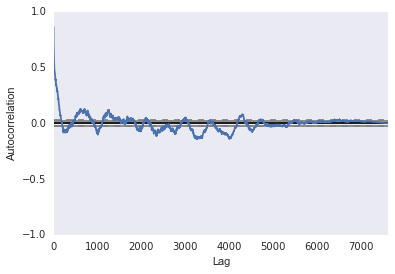

In [71]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(data2007.NumMosquitos)

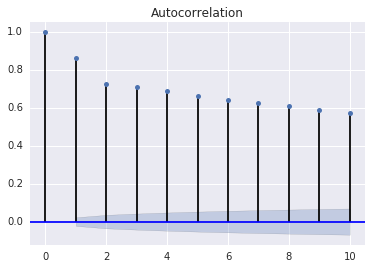

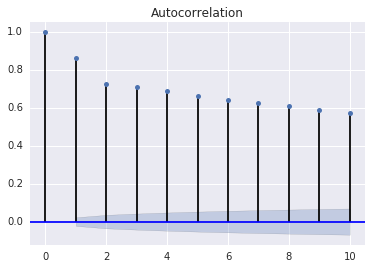

In [73]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data2007.NumMosquitos, lags=10)